In [1]:
from datetime import datetime, timedelta
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

sys.path.append('..')
from util.batcher import Batcher
#from util.stock_loader import Loader

In [2]:
TODAY = datetime.now().date()
TOMORROW  = TODAY + timedelta(1)
TOMORROW

datetime.date(2023, 1, 21)

In [3]:
DATA = '../data'

sp1950 = pd.read_csv(f'{DATA}/sp1950.csv')
nya1965 = pd.read_csv(f'{DATA}/nya1965.csv')
nasdaq1965 = pd.read_csv(f'{DATA}/nasdaq1965.csv')
wilshire1990 = pd.read_csv(f'{DATA}/wilshire1990.csv')


nasdaq1965.tail()
states = pd.read_csv(f'{DATA}/hmm_exp_returns.csv')
states.index = pd.to_datetime(states.Date)
states.tail()

,Date,sp,sp_daily,sp_exp,nyse,nyse_daily,nyse_exp,nas,nas_daily,nas_exp,wil,wil_daily,wil_exp,mean_exp,state
Date,,,,,,,,,,,,,,,
2023-01-13,2023-01-13,3999.090088,1.003997,1.000009,15918.370117,1.003709,1.001059,11079.160156,1.007096,1.000447,39834.101562,1.004312,1.001918,1.000858,2
2023-01-17,2023-01-17,3990.969971,0.997970,1.000009,15883.559570,0.997813,1.001059,11095.110352,1.001440,1.000447,39774.148438,0.998495,0.998900,1.000104,1
2023-01-18,2023-01-18,3928.860107,0.984437,1.000009,15649.129883,0.985241,1.001059,10957.009766,0.987553,1.000447,39167.359375,0.984744,1.001918,1.000858,2
2023-01-19,2023-01-19,3898.850098,0.992362,1.000009,15569.629883,0.994920,1.001059,10852.269531,0.990441,1.000447,38840.679688,0.991659,0.998900,1.000104,1
2023-01-20,2023-01-20,3972.610107,1.018918,1.000009,15777.440430,1.013347,1.001059,11140.434570,1.026553,1.000447,39582.679688,1.019104,1.001918,1.000858,2


In [4]:
SYMBOLS = [
    'AAPL', 'ABMD', 'ABNB', 'ACN', 'ADBE', 'ADYEY', 'AMD', 'AMGN',
    'AMZN', 'ANET', 'ASML', 'AXON', 'BROS', 'BYND', 'CHWY', 'CRWD',
    'DDOG', 'DGX', 'DIS', 'DOCS', 'DOCU', 'DUOL', 'EDIT', 'ETSY',
    'FLGT', 'FTNT', 'GH', 'GMED', 'GOOG', 'IDXX', 'INTG', 'ISRG',
    'JD', 'LRCX', 'LSPD', 'LULU', 'MA', 'MASI', 'MDB', 'MELI', 'MNST',
    'MSFT', 'MTCH', 'NET', 'NOW', 'NVCR', 'NVDA', 'ODFL', 'OKTA',
    'OPEN', 'PAC', 'PANW', 'PAYC', 'PINS', 'PTON', 'PYPL', 'QDEL',
    'RBLX', 'RDFN', 'RGEN', 'RIVN', 'RMD', 'ROKU', 'RVLV', 'SAM',
    'SBUX', 'SE', 'SHOP', 'SNOW', 'TASK', 'TDOC', 'TEAM', 'TMUS', 
    'TREX', 'TSCO', 'TSLA', 'TTD', 'TTWO', 'TWLO', 'TWTR', 'TYL',
    'UPST', 'VEEV', 'VLD', 'VRTX', 'XPEV', 'ZEN', 'ZM']
LINGERERS = [
    'AGI', 'AMEH', 'AMRK', 'APT', 'BRTX', 'BTTR', 'BYRN', 'CEF',
    'CELH', 'CENN', 'CGAU', 'CHEF', 'COOP', 'CTGO', 'CVE', 'DQ',
    'DTST', 'DYAI', 'EA', 'EP', 'ERIE', 'ESOA', 'FCUV', 'FKWL', 'FNV',
    'FSI', 'GCBC', 'GME', 'HBM', 'HMY', 'HNRG', 'IDR', 'INTZ', 'LPLA',
    'MCVT', 'MICS', 'MNMD', 'MOBQ', 'MTA', 'OMQS', 'PACB', 'PETV',
    'POWW', 'PRPH', 'RVP', 'RVYL', 'SAND', 'SOBR', 'TGLS', 'VIRT',
    'VIVO', 'WAVD', 'WKHS', 'WRN', 'YORW', 'ZEST', 'ZYXI']
BEST_WEIGHTED = [
    'AMAT', 'APPS', 'BBY', 'BLMN', 'CF', 'CHUY', 'CSIQ',
    'DGII', 'FIVE', 'GGB', 'GTLS', 'KLAC', 'LFMD', 'MEI', 'SIVB',
    'SIX', 'TECK', 'TGH', 'UAN']

len(SYMBOLS + LINGERERS + BEST_WEIGHTED)

164

In [5]:
TODAY = (datetime.now() + timedelta(1)).date()
YEARS_OF_DATA = 10
START = TODAY - timedelta(YEARS_OF_DATA * 365)
START, TODAY

(datetime.date(2013, 1, 23), datetime.date(2023, 1, 21))

In [6]:
batch = sorted(list(set(SYMBOLS + LINGERERS + BEST_WEIGHTED)))

In [7]:
data = (
    yf
    .download(batch, start=START, end=TODAY)
    .rename(columns={'Adj Close': 'AdjClose'})
    .sort_index())

[*********************100%***********************]  164 of 164 completed


In [8]:
data['state'] = states.state
data.tail()

AdjClose                                                         \
                  AAPL ABMD        ABNB         ACN        ADBE  ADYEY    AGI   
Date                                                                            
2023-01-13  134.759995  NaN  100.370003  282.140015  344.380005  14.88  11.00   
2023-01-17  135.940002  NaN  101.269997  284.880005  344.380005  14.97  10.76   
2023-01-18  135.210007  NaN  101.110001  277.899994  341.309998  14.90  10.75   
2023-01-19  135.270004  NaN   99.099998  272.890015  342.529999  14.15  10.99   
2023-01-20  137.869995  NaN  101.279999  280.470001  356.380005  14.57  11.18   

                                              ... Volume                   \
                  AMAT        AMD       AMEH  ...   WAVD     WKHS     WRN   
Date                                          ...                           
2023-01-13  109.970001  71.000000  35.900002  ...   9500  2364700  155800   
2023-01-17  109.410004  71.589996  35.099998  ...  17500  2643700  170500   
2023-01-18  109.699997  70.529999  34.520000  ...  15200  3076600  155300   
2023-01-19  106.160004  67.709999  33.330002  ...  25400  2448300  153600   
2023-01-20  109.650002  70.070000  34.020000  ...  68093  4458953  209873   

                                                            state  
                  XPEV   YORW ZEN   ZEST         ZM    ZYXI        
Date                                                               
2023-01-13  14763800.0  36400 NaN  47400  2342400.0  162200     2  
2023-01-17  24980400.0  45400 NaN  88900  3776800.0  180000     1  
2023-01-18  18357200.0  41500 NaN  28800  3085800.0  345600     2  
2023-01-19  15296000.0  32900 NaN  52600  2180100.0  265500     1  
2023-01-20  19986313.0  46378 NaN  21418  2835342.0  159735     2  

[5 rows x 985 columns]

In [9]:
STATES = sorted(states.state.unique())
STATES

[0, 1, 2, 3, 4, 5, 6, 7]

In [10]:
CURRENT_STATE = states.state[-1]
CURRENT_STATE

2

In [11]:
def get_stock_data(stock, data):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock]]
    first_value = (
        sub.AdjClose[stock][sub.AdjClose[stock].notna()].index[0])
    sub = sub.loc[first_value:, :]
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    sub.fillna(method='ffill', inplace=True)
    return sub

In [12]:
def get_daily_returns(x):
    idx = x.index
    n = len(x)
    x = np.array(x)
    #return x[2:n] / x[1:(n - 1)] - 1 
    returns = x[1:n] / x[0:(n-1)] - 1
    returns = pd.Series(returns, index=idx[1:])
    return returns

In [13]:
def get_sharpe(returns, window=None):
    n = len(returns)
    if window is None:
        window = n
    if len(returns) > window:
        returns = returns[(n - window):n]
    returns = returns[~np.isnan(returns)]
    sharpe = (np.sqrt(252) * returns.mean()) / returns.std()
    return sharpe

In [14]:
def get_hedged_sharpe(daily_returns, data):
    state_sharpe = get_sharpe(
        daily_returns[data.state == CURRENT_STATE])
    lower_state_sharpe = get_sharpe(
        daily_returns[data.state == max(CURRENT_STATE - 1, 0)])
    upper_state_sharpe = get_sharpe(
        daily_returns[
            data.state == min(CURRENT_STATE + 1, max(STATES))])
    return min(state_sharpe, lower_state_sharpe, upper_state_sharpe)

In [15]:
trans = pd.read_csv('../data/transition_probs.csv')
trans

,next_state,prob
0,0,0.015704
1,1,0.386988
2,2,0.426248
3,3,0.000561
4,4,0.031408
5,6,0.000561
6,7,0.138531


In [16]:
def get_weighted_sharpe(daily_returns, data, trans=trans):
    #state_sharpe = get_sharpe(
    #    daily_returns[data.state == CURRENT_STATE])
    #n_lower = (data.state == max(CURRENT_STATE - 1, 0)).sum()
    #decr = 1 if n_lower else 2
    #lower_state_sharpe = get_sharpe(
    #    daily_returns[data.state == max(CURRENT_STATE - decr, 0)])
    #n_upper = (data.state == max(CURRENT_STATE + 1, 0)).sum()
    #incr = 1 if n_lower else 2
    #upper_state_sharpe = get_sharpe(
    #    daily_returns[
    #        data.state == min(CURRENT_STATE + incr, max(STATES))])
    #return (
    #    weights[0]*lower_state_sharpe
    #    + weights[1]*state_sharpe
    #    + weights[2]*upper_state_sharpe)
    out = 0
    for state, prob in zip(trans.next_state, trans.prob):
        if len(daily_returns[data.state == state]):
            state_sharpe = get_sharpe(
                daily_returns[data.state == state])        
            print(state, state_sharpe)
            out += prob * state_sharpe
    return out

In [17]:
def rescale(a):
    a = a - a.min()
    a = a / a.max()
    return a

In [18]:
def vals_to_quantiles(a):
    n = len(a)
    qs = np.linspace(0, 1, n)
    order = np.argsort(a)
    out = qs[order]
    return out

In [19]:
def get_rsi(stock_data, window=14):
    df = stock_data.copy()
    df['deltas'] = df.AdjClose.diff(1)
    df['gains'] = df.deltas.clip(lower=0)
    df['losses'] = df.deltas.clip(upper=0).abs()
    df['avg_gain'] = (df.gains
                      .rolling(window=window, min_periods=window)
                      .mean()[:window + 1])
    df['avg_loss'] = (df.losses
                      .rolling(window=window, min_periods=window)
                      .mean()[:window + 1])
    
    # avg gains
    pd.options.mode.chained_assignment = None
    for i, row in enumerate(df.avg_gain.iloc[window + 1:]):
        df.avg_gain.iloc[i + window + 1] = (
            (df.avg_gain.iloc[i + window] * (window - 1) 
             + df.gains.iloc[i + window + 1]) 
            / window)
    # avg losses
    for i, row in enumerate(df.avg_loss.iloc[window + 1:]):
        df.avg_loss.iloc[i + window + 1] = (
            (df.avg_loss.iloc[i + window] * (window - 1)
             + df.losses.iloc[i + window + 1])
            / window)
    df['rs'] = df.avg_gain / df.avg_loss
    df['rsi'] = 100 - (100 / (1. + df.rs))
    return df.rsi

In [20]:
def get_macd(stock_data, fast=60, slow=90, signal=80, plot=False):
    df = stock_data.copy()
    exp1 = df.AdjClose.ewm(span=fast, adjust=False).mean()
    exp2 = df.AdjClose.ewm(span=slow, adjust=False).mean()
    macd = exp1 - exp2
    exp3 = macd.ewm(span=signal, adjust=False).mean()
    histo = macd - exp3
    hdiff = histo.diff(1)
    is_rising = 1 * (hdiff > 0)
    if plot:
        plt.plot(macd, label='MACD', color='red')
        plt.plot(exp3, label='Signal', color='green')
        #plt.xlim(pd.to_datetime('2021-01-01'), 
        #         pd.to_datetime('2021-10-14'))
        plt.legend();
        plt.figure()
        plt.plot(histo, color='blue')
        #plt.xlim(pd.to_datetime('2021-01-01'), 
        #         pd.to_datetime('2021-10-14'))
        plt.axhline(y=0, color='k')
        plt.figure()
        plt.plot(is_rising)
        #plt.xlim(pd.to_datetime('2021-01-01'), 
        #         pd.to_datetime('2021-10-14'))
    return is_rising

In [21]:
LMB = 0.9
RSI_WINDOW = 14
MACD_PARAMS = (60, 90, 80, False)

In [22]:
EXAMPLE = 'AAPL'

In [23]:
stock_data = get_stock_data(EXAMPLE, data.copy())
daily_returns = get_daily_returns(stock_data.AdjClose)
daily_returns
(get_sharpe(daily_returns), 
 get_sharpe(daily_returns[data.state == CURRENT_STATE]))

(0.8933816388863939, 1.2103018435004762)

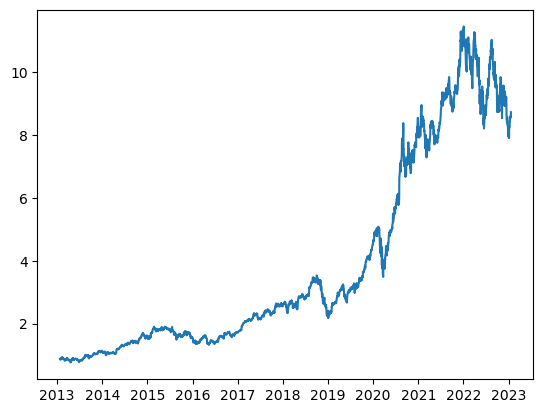

In [24]:
plt.plot(
    (get_daily_returns(data[('AdjClose', EXAMPLE)]) + 1).cumprod());

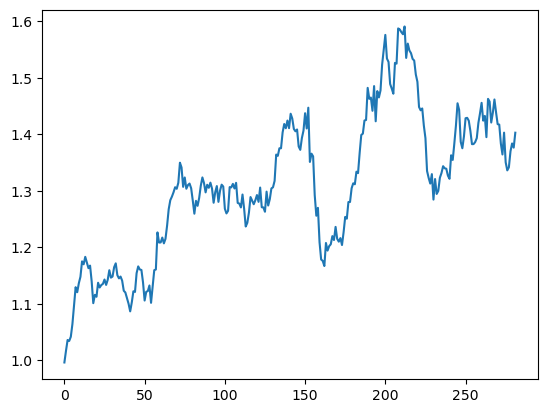

In [25]:
dr = get_daily_returns(
    data[('AdjClose', EXAMPLE)]
)[data.state == CURRENT_STATE]
dr = dr[dr.notnull()]
plt.plot((dr + 1).to_numpy().cumprod());

In [26]:
get_weighted_sharpe(daily_returns, data.copy())

0 -5.622985523024369
1 0.6149126103806735
2 1.2103018435004762
4 4.0140324104454885
6 2.7399770037506426
7 4.391764366594855


1.4015519338844484

In [27]:
def process_stock(stock, data, lmb=LMB, plot=False):
    stock_data = get_stock_data(stock, data)
    n = len(stock_data.AdjClose[~np.isnan(stock_data.AdjClose)])
    stock_data['direction'] = get_macd(stock_data, *MACD_PARAMS)
    stock_data['rsi'] = get_rsi(stock_data, window=RSI_WINDOW)
    stock_data.rsi = stock_data.rsi.rank(pct=True)
    daily_returns = get_daily_returns(stock_data.AdjClose)
    sharpe = get_sharpe(daily_returns)
    #state_sharpe = get_sharpe(
    #    daily_returns[data.state == CURRENT_STATE])
    #hedged_sharpe = get_hedged_sharpe(daily_returns, data)
    weighted_sharpe = get_weighted_sharpe(daily_returns, data)
    stock_data.fillna(method='ffill', inplace=True)
    stock_data.fillna(method='bfill', inplace=True)
    WINDOW = min(n // 2, 125)
    stock_data['ann_high'] = (
        stock_data.AdjClose.rolling(window=WINDOW).max())
    stock_data['ann_low'] = (
        stock_data.AdjClose.rolling(window=WINDOW).min())
    stock_data['drawdown'] = stock_data.AdjClose / stock_data.ann_high
    stock_data.drawdown = stock_data.drawdown.rank(pct=True)
    stock_data['pullup'] = stock_data.AdjClose / stock_data.ann_low
    stock_data.pullup = stock_data.pullup.rank(pct=True)
    w = [lmb ** t for t in range(n)][::-1]
    stock_data['W'] = w
    stock_data['n_samp'] = (stock_data.Volume / 100)  * stock_data.W
    stock_data['value'] = (
        (stock_data.AdjClose 
         + stock_data.High 
         + stock_data.Low 
         + stock_data.Open) 
        / 4)
    stock_data['est'] = np.nan
    for day in stock_data.index:
        sub = stock_data[stock_data.index <= day]
        weights = sub.n_samp
        weights = weights / weights.sum()
        values = sub.value
        est = np.dot(weights, values)
        stock_data.loc[day, 'est'] = est
    stock_data['resid'] = stock_data.AdjClose / stock_data.est
    stock_data.resid = stock_data.resid.rank(pct=True)
    stock_data.sort_values('resid', inplace=True)
    n_notnull_resid = stock_data.resid.notnull().sum()
    stock_data['dev'] = np.nan
    stock_data.loc[stock_data.resid.notnull(), 'dev'] = (
        np.array(range(n_notnull_resid) / n_notnull_resid))
    stock_data.dev = stock_data.dev.rank(pct=True)
    stock_data.sort_index(inplace=True)
    if plot:
        plt.figure(figsize=(12, 8))
        plt.plot(stock_data.AdjClose, label='AdjClose')
        plt.plot(stock_data.est, label='Est')
        plt.yscale('log')
        plt.plot(stock_data.ann_high, color='green')
        plt.plot(stock_data.ann_low, color='red')
        plt.legend();
        
        plt.figure(figsize=(12, 4))
        plt.plot(stock_data.dev)
        plt.axhline(0.5, color='k')
        plt.title(stock)
        
        plt.figure(figsize=(12, 4))
        plt.plot(stock_data.drawdown, color='red', label='drawdown')
        plt.plot(stock_data.pullup, color='green', label='pullup')
        plt.plot(
            np.sqrt(stock_data.drawdown * stock_data.pullup),
            color='grey',
            label='geomean')
        plt.yscale('log')
        plt.legend()
    return (
        stock_data.direction.tolist()[-1],
        stock_data.rsi.tolist()[-1],
        stock_data.resid.tolist()[-1], 
        stock_data.dev.tolist()[-1],
        stock_data.drawdown.tolist()[-1],
        stock_data.pullup.tolist()[-1],
        sharpe,
        #state_sharpe,
        #hedged_sharpe,
        weighted_sharpe)

0 -5.622985523024369
1 0.6149126103806735
2 1.2103018435004762
4 4.0140324104454885
6 2.7399770037506426
7 4.391764366594855


(1,
 0.5361566120655213,
 0.9189511323003575,
 0.2550655542312277,
 0.07438361888842457,
 0.15879648976180527,
 0.8933816388863939,
 1.4015519338844484)

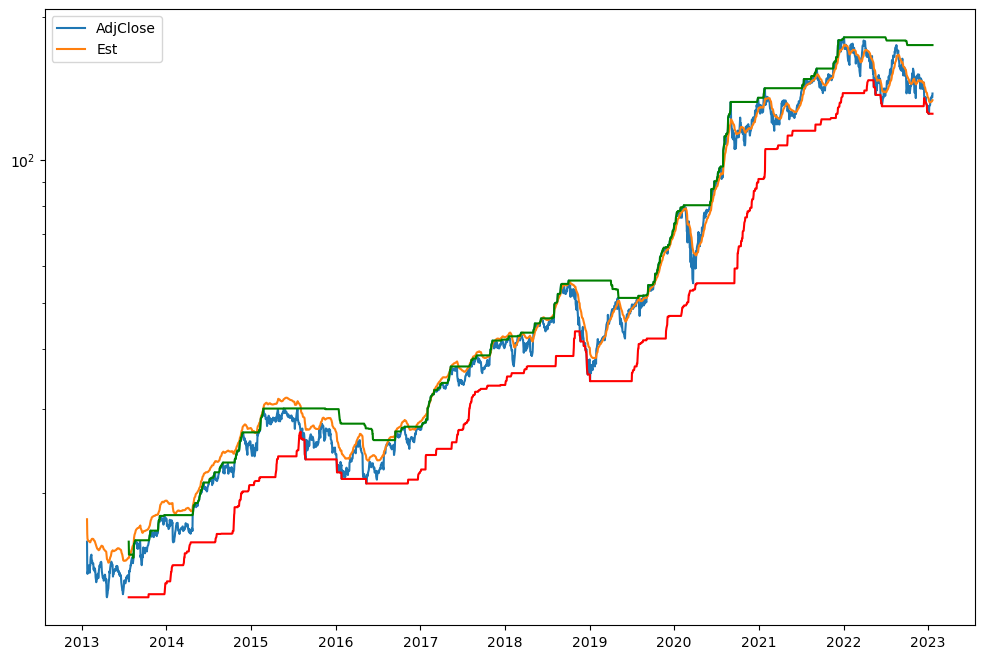

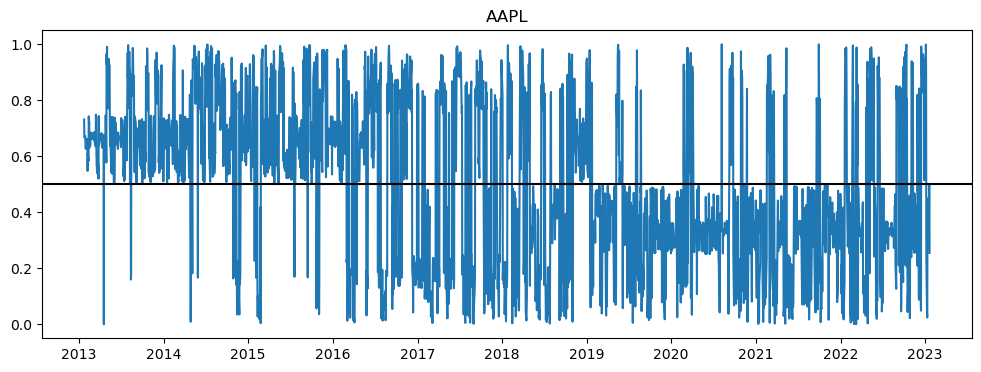

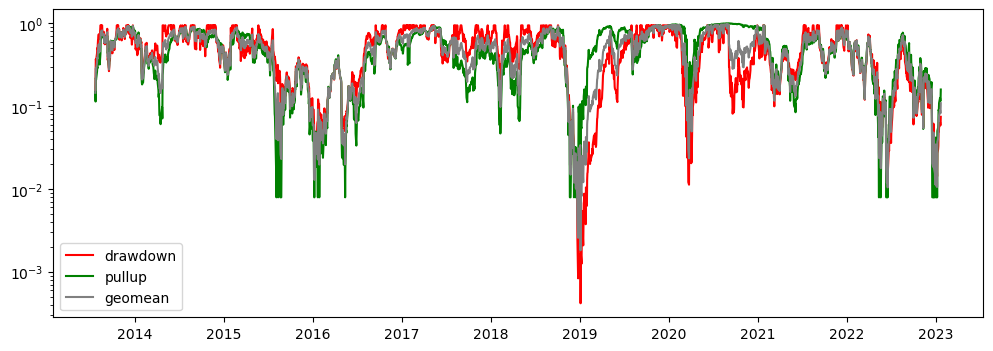

In [28]:
process_stock('AAPL', data.copy(), plot=True)

In [29]:
out = []
for stock in batch:
    print(f'{stock}...', end=' ')
    stock_stats = process_stock(stock, data)
    out.append([stock, *stock_stats])

AAPL... 0 -5.622985523024369
1 0.6149126103806735
2 1.2103018435004762
4 4.0140324104454885
6 2.7399770037506426
7 4.391764366594855
ABMD... 0 -2.2373964945643223
1 1.0043995618308148
2 1.3271174996975723
4 2.099723473312208
6 0.36313423987995525
7 4.789617252762645
ABNB... 0 -3.363151822953935
1 0.7266672067406109
2 0.6137344554499797
6 -1.1015280087434294
7 3.3221960576532106
ACN... 0 -5.483825337452501
1 0.2770496399979179
2 2.425452247805945
4 2.274043483620393
6 1.4022125151637654
7 5.302631680639205
ADBE... 0 -5.223355661529072
1 -0.3692112012077105
2 1.1602842856440039
4 3.1920981838002422
6 2.136905178378161
7 5.539096275234148
ADYEY... 0 -2.008725567436847
1 0.5451864202200137
2 0.7046151203192337
4 4.392460618911991
6 2.1473184121018893
7 8.943011896177483
AGI... 0 -0.794149532157831
1 0.7949096999336432
2 0.6420601068665194
4 0.12048866257550528
6 2.016883763373182
7 0.41138608626067175
AMAT... 0 -5.768472443892602
1 1.131092918531038
2 2.2806806009230467
4 2.281800126264769

GGB... 0 -3.9043561821509045
1 1.4657237542165795
2 0.089728744577034
4 1.7043605331118645
6 2.377953463260383
7 2.0369927298164363
GH... 0 -2.3886838948175635
1 0.3905652563516379
2 0.1114938166918116
4 2.0458187139705273
6 -0.8425049264988576
7 7.142261511616966
GME... 0 -0.5496090991934007
1 1.5623364581303782
2 0.5815140769900975
4 0.10153942156630176
6 -0.6642496641021709
7 2.073020558275383
GMED... 0 -4.221894054583999
1 1.1710083191021312
2 0.2866523633712134
4 1.35842692524084
6 4.036345687012541
7 3.521489914988369
GOOG... 0 -6.887922868214449
1 0.35968070564060856
2 2.5436603912545914
4 3.7004898923608387
6 2.4077448735232716
7 4.653799912688732
GTLS... 0 -3.3562231575696853
1 1.719858778012878
2 0.899034179801935
4 1.2289872288618844
6 0.8691202190642037
7 2.0669597173159464
HBM... 0 -4.149026573151201
1 1.0480702267461153
2 1.0326492321320537
4 0.5668458102095917
6 1.9144405681199037
7 2.1323650402097543
HMY... 0 -1.2774010167480787
1 1.3408239566967761
2 1.0839915390156896

SAM... 0 -2.1703649537583662
1 0.7032115704226677
2 0.3844984290788872
4 0.6516031295579048
6 0.7638406455874172
7 2.3265079350886175
SAND... 0 -2.0714576634245643
1 0.8805054949672996
2 0.6591072427749517
4 0.5195199674711775
6 2.164566946624893
7 0.9455742808240702
SBUX... 0 -4.04636125197971
1 0.23810379747345253
2 3.7892111596086044
4 0.8003282582423931
6 -0.14019709475027067
7 4.710333403280738
SE... 0 -2.0318755820400747
1 -0.18978962470298075
2 0.7773224195538712
4 1.1639761258164922
6 1.862525094008117
7 6.007529601431822
SHOP... 0 -3.331506353195725
1 -0.8128213641772722
2 2.021945518326683
4 3.5747340121906093
6 1.2669559226586504
7 5.482311318206036
SIVB... 0 -5.135750898218679
1 0.40397428251415085
2 1.3952105468669382
4 2.4452792181977197
6 3.783367727861165
7 4.042435959588959
SIX... 0 -2.940544503982772
1 1.2238239465231937
2 2.736462564499961
4 -0.2596781220632211
6 -1.3824944431156703
7 3.03553047985985
SNOW... 0 -2.4184619320604153
1 0.042988764110950685
2 -0.65981812

In [30]:
out_df = pd.DataFrame(
    data=out, 
    columns=[
        'stock', 'direction', 'RSI', 'fair_value_mult', 'dev_quantile',
        'drop','climb', 'sharpe', 'weighted_sharpe'])
out_df['geomean'] = np.sqrt(out_df['drop'] * out_df.climb)
out_df['score'] = (
    out_df.fair_value_mult
    * out_df.dev_quantile
    * out_df['drop']
    * out_df.climb) ** (1/4) 
out_df['RSIRev'] = 1 - out_df.RSI
out_df = out_df[
    ['stock', 'direction', 'RSI', 'RSIRev', 'fair_value_mult', 
     'dev_quantile', 'drop', 'climb', 'geomean', 'score',  'sharpe',
     'weighted_sharpe']]
out_df.RSI.fillna(out_df.RSI.median())
out_df.RSIRev.fillna(out_df.RSIRev.median())

out_df.weighted_sharpe.fillna(
    out_df.weighted_sharpe.mean(), inplace=True)
out_df.sort_values('stock')
out_df.head()

,stock,direction,RSI,RSIRev,fair_value_mult,dev_quantile,drop,climb,geomean,score,sharpe,weighted_sharpe
0,AAPL,1,0.536157,0.463843,0.918951,0.255066,0.074384,0.158796,0.108682,0.229385,0.893382,1.401552
1,ABMD,0,0.920296,0.079704,0.394716,0.805721,0.891559,0.760343,0.823341,0.681408,0.967186,1.648896
2,ABNB,1,0.924565,0.075435,0.875706,0.374765,0.729730,0.594595,0.658706,0.614292,-0.010599,0.949608
3,ACN,1,0.445465,0.554535,0.927294,0.278903,0.141663,0.399499,0.237895,0.347825,0.767631,1.861727
4,ADBE,1,0.729125,0.270875,0.890743,0.296385,0.103218,0.681571,0.265236,0.369163,0.866157,1.138451


In [31]:
out_df.geomean.quantile([0.05, 0.99])

0.05    0.094381
0.99    0.930193
Name: geomean, dtype: float64

In [32]:
out_df.to_csv('individ_quantiles.csv', index=False)

In [33]:
!open individ_quantiles.csv